## Distribution for rolling dices-Part 1
The next few questions involve rolling a 20-sided die (can roll values 1-20).

**(a) If you roll a single die with 20 sides, what is the probability distribution? Print the distribution as EITHER a list OR an array**

In [1]:
import numpy as np       #import some packages for the future use
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
p = [1/20] * 20 # make a list of 20 elements where each element is 1/20

print(p) # show this probability distribution

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


**(b) Write a function that simulates rolling a 20-sided die an arbitary number of times. Your function should take an integer parameter and return an array of roll outputs. (Your function MUST be able to "roll" a 20-sided die. If you wish, it may be able to roll a die with an arbitrary number of sides, but this is not required.)**

**SHOW your function works by "rolling" your 20-sided die 15 times. Print the output of these rolls as a single list or array.**

In [3]:
def roll_dice(times, faces=20):
    # use numpy randint function to do this all at once
   
    results = np.random.randint(low=1, 
                                high=faces+1, # note: exclusive of "high"
                                size=times)
    
    return results

In [4]:
roll_dice(15)     #roll 20-sided die 15 times

array([16,  6,  2, 20,  8, 11, 12, 14, 14,  2,  2, 11, 15,  6, 11])

**(c) Use the function you wrote in Question 3b to simulate rolling a 20-sided die 10,000 times. Plot a probablity distribution function of the results.**

* **The y-axis should indicate the _percentage_ of times each number was rolled. EITHER a 0-1 OR a 0-100 scale is fine, but it should NOT be the raw counts.**
* **On the same plot, include a horizontal line with the expected probability distribution (ie, your answer from Q3a)**

In [5]:
def plot_observed(results, faces=20):  
    n_rolls = len(results) # the number of rolls we made
    
    # make histogram, keep bin height
    n, __, __ = plt.hist(rolls, 
                         weights = np.ones(len(rolls)) / len(rolls),
                         bins=np.arange(.5, faces + 1.5, 1), # define bin edges
                         rwidth=.8) # allow some white space
    
    # make horizontal line at 1/20(faces) of observations
    plt.hlines(y=(1/faces), xmin=0.5, xmax=faces+.5, 
           ls='--', lw=2, 
           color='grey', label='1/20 of observations') 
    
    plt.xlabel('Value')           #plot x label 
    plt.ylabel('Observed Rolls')  #plot y label 
    plt.title('Distribution of {} d20 Rolls'.format(n_rolls))
    locs, __ = plt.xticks()
    plt.xticks(np.arange(1, 21, step=1))    #re-lable the x ticks 
   
    plt.legend() # show label of horizonal line
    plt.show() # show plot

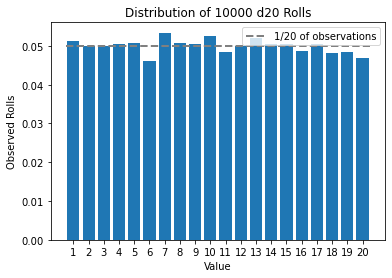

In [6]:
# simulate rolling a 20-sided die 10,000 times
rolls = roll_dice(times=10000)
plot_observed(rolls)    #plot the probablity distribution function of the results

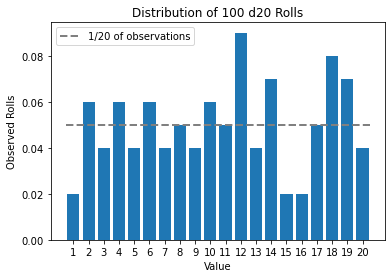

In [7]:
rolls = roll_dice(100)     #I just want to try out to see what looks like when simulating 100 times
plot_observed(rolls) 

**(d) How does the distribution of 10,000 roles you generated in Q3c compare to the expected distribution? What guarantees this behavior?**

The distribution of 10,000 I generated is very close to the expected distribution. This is because of the Law of Large Numbers. According to this theorem, if we do something bunch of times, the observed results will converge to the actual values. In this case, because each side has the equal chance theoretically, so more times to roll the die, the results will more like an uniform distribution. 

## Distribution for rolling dices-Part 2
This question asks about the likelihood of observing a given (or smaller) mean on a set of 20-sided dice rolls.

This is inspired by the so-called "Wil Wheaton dice curse" named after actor Wil Wheaton who consistently rolls so poorly (low), that he is said to be "cursed."

Specifically, Wheaton was observed to have the following set of outcomes when rolling a 20-sided die:

    observed = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 
                4, 4, 4, 4, 5, 6, 6, 6, 6, 6, 
                7, 7, 8, 8, 9, 9, 9, 9, 11, 11, 
                12, 13, 13, 14, 14, 14, 15, 15, 
                17, 18, 19, 19, 20]

**(a) Plot a histogram of these observed dice rolls. Your plot can show EITHER the raw counts OR the density (eg, percentage)**

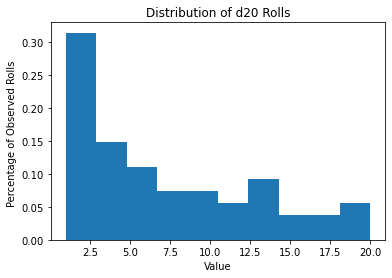

In [8]:
observed = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
            2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 
            4, 4, 4, 4, 5, 6, 6, 6, 6, 6, 
            7, 7, 8, 8, 9, 9, 9, 9, 11, 11, 
            12, 13, 13, 14, 14, 14, 15, 15, 
            17, 18, 19, 19, 20]

# make pdf as a weighted histogram
plt.hist(observed, 
         weights=np.ones(len(observed)) / len(observed))

# label axes, etc
plt.xlabel('Value')
plt.ylabel('Percentage of Observed Rolls ')
plt.title('Distribution of d20 Rolls')

plt.show()
#shows values instead of bins

**(b) Write a function that calculates the mean for an arbitrary number of dice rolls an arbitrary number of times. For example, if your function takes integer parameters _times_ and _dice_, then for (dice=10, times=5) it would roll 10 dice 5 times. Save the average (mean) each time you roll the dice and return an array (or list) of length _times_ where each element of the array is an average of _dice_ rolls.**

**SHOW your function works by rolling 10 dice (all 20-sided) 5 times and printing the output as a single list or array.**

**Hint: Here is some sample output from six calls to my function. Note that because this is a _stochastic process_ (eg, random) you will NOT see the exact same outout. For this question, you only need to show output from ONE call to your function**


```
    for i in range(6):
        roll_avg = mean_rolls(dice=10, times=5)
        print(roll_avg)
   
    [ 8.6  7.9 12.  11.2 10.9]
    [ 7.7 10.7 11.3  9.5  8.5]
    [ 9.2  9.9 10.   6.7 10.9]
    [13.4 11.  12.8  8.6 11. ]
    [12.9 10.9  7.9  7.4  9.9]
    [ 8.2  8.1 11.8  7.8 12.4]
```

**NOTES:**

* **Your function MAY call your function from 3b. This is encouraged, but not required**
* **Your function MUST be able to "roll" a 20-sided die. If you wish, it may be able to roll a die with an arbitrary number of sides, but this is not required.**
* **You may name your function and parameters whatever you wish**



In [10]:
def mean_rolls(dice, times):   #define a function called dice_roller
    results=[]
    for t in range(times):           #for loop to find the variable in each time
        t = 1
        temp = roll_dice(faces=20, times=dice)
        mean_temp = sum(temp)/len(temp)    #find average number
        results.append(mean_temp)
    return results

In [11]:
roll_avg = mean_rolls(10, 5)    #the average number of rolling 10 dice 5 times
print(roll_avg)

[12.1, 9.4, 8.7, 11.8, 12.1]


**(c) Using your function from Q4b, roll a number of dice _equal to the number of observed dice rolls_ (e.g., the length of _observed_.) Do this 100 times.**

**PLOT the resulting distribution of means. INCLUDE a vertical line indicating the observed mean. (Your plot can indicate raw counts or percentages).**

In [12]:
len(observed)      #find the lenth of the obsered 

54

In [13]:
newRollAvg = mean_rolls(54, 100)   #roll observed dice rolls 100 times

print(newRollAvg)

[10.38888888888889, 10.462962962962964, 9.851851851851851, 10.75925925925926, 10.296296296296296, 9.962962962962964, 11.12962962962963, 10.166666666666666, 11.407407407407407, 9.074074074074074, 10.61111111111111, 10.574074074074074, 9.88888888888889, 10.425925925925926, 12.87037037037037, 10.5, 10.574074074074074, 11.685185185185185, 10.166666666666666, 9.944444444444445, 10.851851851851851, 9.018518518518519, 10.592592592592593, 11.925925925925926, 10.796296296296296, 11.296296296296296, 9.222222222222221, 10.814814814814815, 11.851851851851851, 11.462962962962964, 11.907407407407407, 11.851851851851851, 9.12962962962963, 10.592592592592593, 10.037037037037036, 11.944444444444445, 9.25925925925926, 11.592592592592593, 12.425925925925926, 10.407407407407407, 9.925925925925926, 10.518518518518519, 11.481481481481481, 10.592592592592593, 9.444444444444445, 12.148148148148149, 11.592592592592593, 9.981481481481481, 10.796296296296296, 10.592592592592593, 10.722222222222221, 11.1851851851

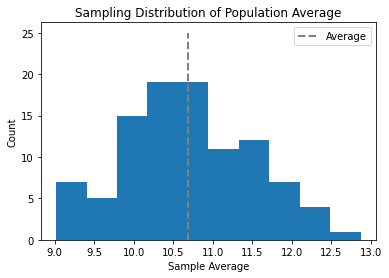

In [14]:
# find the *average* of these averages
total_avg = np.mean(newRollAvg)

# plot this
plt.hist(newRollAvg)
plt.vlines(x=total_avg, ymin=0, ymax=25,     #find the average line 
           color='grey', ls='--', lw=2, label='Average')
plt.xlabel('Sample Average')
plt.ylabel('Count')
plt.title('Sampling Distribution of Population Average')
plt.legend()
plt.show()

**(d) Using your function from Q4b, roll -- 10000 times -- a number of dice _equal to the number of observed dice rolls_.**

**PLOT the resulting distribution of means. INCLUDE a vertical line indicating the observed mean. (Your plot can indicate raw counts or percentages).**

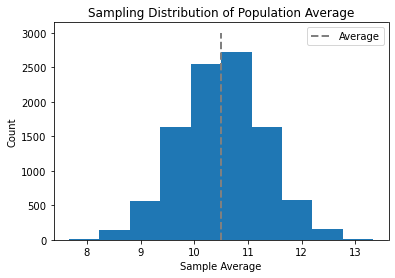

In [15]:
LastRollAvg = mean_rolls(len(observed), 10000)   #roll observed dice rolls 1000 times

# find the *average* of these averages
total_avg = np.mean(LastRollAvg)

# plot this
plt.hist(LastRollAvg)
plt.vlines(x=total_avg, ymin=0, ymax=3000,     #find the average line 
           color='grey', ls='--', lw=2, label='Average')
plt.xlabel('Sample Average')
plt.ylabel('Count')
plt.title('Sampling Distribution of Population Average')
plt.legend()
plt.show()

**(e) Compare your plots from Q4d and Q4c: As we increase the number of samples we draw (eg, times we roll the dice), what do you notice about the shape of the sampling distribution of the sample mean? What mathematical result guarantees this?**

As we increase the number of samples we draw, the shape of the sampling distribution of the sample mean is more like a bell curved normal distribution shape. As we know from the central limit theorm, we see that the sample mean converges to the true population mean.